In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches 
import matplotlib.ticker as mtick

plt.style.use('bmh')
%matplotlib inline

In [2]:
def dataCleaner(filePath):
    df = pd.read_csv(filePath, low_memory=False, skiprows=1)
    badGeo = ['Geo_NAME', 'Geo_QName', 'Geo_FIPS', 'Geo_SUMLEV', 'Geo_GEOCOMP',
              'Geo_STATECE', 'Geo_STATE', 'Geo_COUNTY', 'Geo_COUNTYSC', 'Geo_COUSUB'
              'Geo_REGION', 'Geo_DIVISION']
    df.columns = [_.strip() for _ in df.columns]
    try:
        df.set_index('Geo_TRACT', inplace=True)
    except:
        try:
            df.set_index('Geo_TRACT6', inplace=True)
        except:
            df.set_index('Geo_TractCode', inplace=True)
        
    df = df.drop(badGeo, errors='ignore', axis=1)
    df = df.dropna(axis=1, how='all')
    df = df.dropna(axis=0, how='all')
    df = df[df['SE_T001_001'] > 650] # Places with positive population
    names = names = pd.read_csv(filePath, nrows=1)
    colMapper = dict(zip(list(names.values[0]), list(names.columns)))
    return df, colMapper

In [4]:
df10, names10 = dataCleaner('2010.csv')
df00, names00 = dataCleaner('2000.csv')
df90, names90 = dataCleaner('1990.csv')
df80, names80 = dataCleaner('1980.csv')
df70, names70 = dataCleaner('1970.csv')

### Poverty Columns
* 2000: 'PCT_SE_T179_002'
* 1990: 'PCT_SE_T092_002'
* 1980: 'PCT_SE_T097_002' (above line)
* 1970: 'PCT_SE_T088_003
#### Poverty Status Determined
.75 to 1.24
* 1980 PCT_SE_T110_003: 
* 

In [5]:
pov10 = df10['PCT_SE_T113_002'][~df10['PCT_SE_T113_002'].isnull()] / 100
pov10.name = 'Poverty Rate'
pov00 = df00['PCT_SE_T179_002'][~df00['PCT_SE_T179_002'].isnull()] / 100
pov00.name = 'Poverty Rate'
pov90 = df90['PCT_SE_T092_002'][~df90['PCT_SE_T092_002'].isnull()] / 100
pov90.name = 'Poverty Rate'
pov80 = df80['PCT_SE_T097_008'][~df80['PCT_SE_T097_008'].isnull()] / 100
pov80.name = 'Poverty Rate'
pov70 = df70['PCT_SE_T088_003'][~df70['PCT_SE_T088_003'].isnull()] / 100
pov70.name = 'Poverty Rate'

In [6]:
cityWidePov10 = np.average(pov10, weights=df10['SE_T001_001'][~df10['PCT_SE_T113_002'].isnull()])
cityWidePov00 = np.average(pov00, weights=df00['SE_T001_001'][~df00['PCT_SE_T179_002'].isnull()])
cityWidePov90 = np.average(pov90, weights=df90['SE_T001_001'][~df90['PCT_SE_T092_002'].isnull()])
cityWidePov80 = np.average(pov80, weights=df80['SE_T001_001'][~df80['PCT_SE_T097_008'].isnull()])
cityWidePov70 = np.average(pov70, weights=df70['SE_T001_001'][~df70['PCT_SE_T088_003'].isnull()])

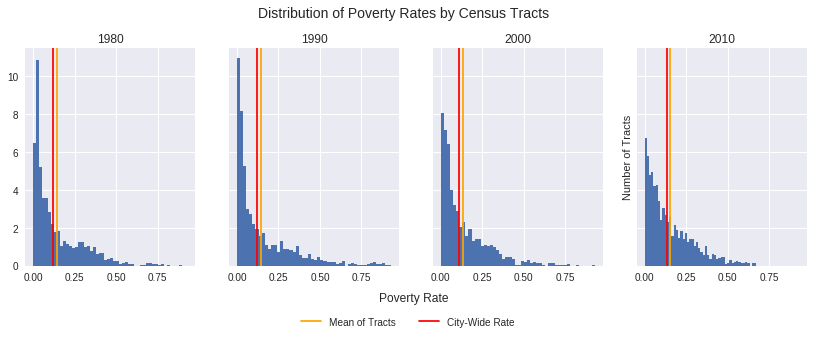

In [63]:
fig, axs = plt.subplots(1,4, sharex=True, sharey=True)
fig.set_figwidth(14)
fig.suptitle("Distribution of Poverty Rates by Census Tracts\n\n", fontsize=14, y=1.025)
fig.text(0.51, 0.0, 'Poverty Rate', ha='center', fontsize=12)
fig.set_figheight(4)


axs[0].set_title("1980")
axs[0].hist(pov80.values, bins=50, normed=True)
axs[0].axvline(pov80.mean(), color='orange')
axs[0].axvline(cityWidePov80, color='red')

axs[1].set_title("1990")
axs[1].hist(pov90.values, bins=50, normed=True)
axs[1].axvline(pov90.mean(), color='orange')
axs[1].axvline(cityWidePov90, color='red')

axs[2].set_title("2000")
axs[2].hist(pov00.values, bins=50, normed=True)
axs[2].axvline(cityWidePov00, color='red')
axs[2].axvline(pov00.mean(), color='orange')

axs[3].set_title("2010")
axs[3].hist(pov10.values, bins=50, normed=True)
axs[3].axvline(cityWidePov10, color='red')
axs[3].axvline(pov10.mean(), color='orange')
axs[3].set_ylabel('Number of Tracts')

avg = mlines.Line2D([], [], color='orange', label='Mean of Tracts ')
city = mlines.Line2D([], [], color='red', label='City-Wide Rate')
plt.legend(handles=[avg, city], loc = (-2, -.3), ncol=2)
plt.show()

In [8]:
nationalRates = pd.read_csv('./nationalPovertyRate.csv', index_col='Year')
relvYears = nationalRates.loc[1970:2010, 'Rate'] / 100

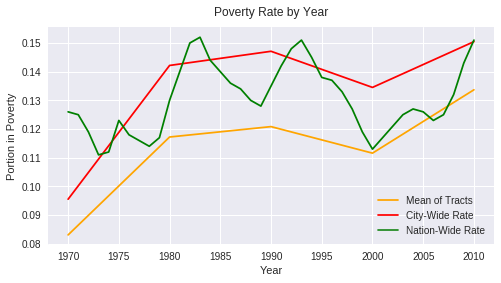

In [60]:
# Source: U.S. Bureau of the Census, Current Population Survey, Annual Social and Economic Supplements
plt.figure(figsize=(8, 4))
plt.plot([1970, 1980, 1990, 2000, 2010], [pov70.mean(), pov80.mean(), pov90.mean(), pov00.mean(), pov10.mean()], color='red')
plt.plot([1970, 1980, 1990, 2000, 2010], [cityWidePov70, cityWidePov80, cityWidePov90, cityWidePov00, cityWidePov10], color='orange')
plt.plot(relvYears, color='green')
plt.ylabel('Portion in Poverty')
plt.title('Poverty Rate by Year', y=1.025)
avg = mlines.Line2D([], [], color='orange', label='Mean of Tracts ')
city = mlines.Line2D([], [], color='red', label='City-Wide Rate')
nation = mlines.Line2D([], [], color='forestgreen', label='Nation-Wide Rate')

plt.xlabel('Year')
plt.legend(handles=[avg, city, nation])
plt.show()

## Gini

In [10]:
def gini(wgts, y):
    mean = np.average(y, weights=wgts)
    total = 0
    for i in range(len(y)):
        wgt = wgts[i]
        y_i = y[i]
        inter_sum = wgt * np.multiply(wgts, abs(y - y_i))
        total += inter_sum.sum()

    rv = total * (1.0/(wgts.sum() ** 2)) * (1.0/(2 * mean))
    return rv

### Within Tract

In [11]:
inc10 = df10.filter(regex='^PCT_SE_T056_*') / 100
money10 = np.asarray([7500, 12500, 17500, 22500, 27500, 32500, 37500, 42500, 47500, 55000, 67500, 
                      82500, 112500, 137500, 175000, 250000])

inc00 = df00.filter(regex='^PCT_SE_T092_*') / 100
money00 = np.asarray([7500, 12500, 17500, 22500, 27500, 32500, 37500, 42500, 47500, 55000, 67500, 
                      82500, 112500, 137500, 175000, 250000])

inc90 = df90.filter(regex='^PCT_SE_T041_*') / 100
money90 = np.asarray([4500, 7500, 11500, 13500, 16500, 18500, 21500, 23500, 26500, 28500, 31500, 
                      33500, 36500, 38500, 41500, 43500, 47000, 48500, 52500, 57500, 68000, 82000, 
                      115000, 135000, 275000])
inc80 = df80.filter(regex='^PCT_SE_T052_*') / 100
money80 = np.asarray([2000, 3500, 6200, 8500, 11000, 13500, 16500, 18500, 21500, 23000, 26000, 
                      28200, 32500, 37500, 45000, 62500, 125000])

In [12]:
def computeGini(wgts, y):

    mean = np.average(y, weights=wgts)
    total = 0
    for i in range(len(y)):
        wgt = wgts[i]
        y_i = y[i]
        inter_sum = wgt * np.multiply(wgts, abs(y - y_i))
        total += inter_sum.sum()

    rv = total * (1.0/(wgts.sum() ** 2)) * (1.0/(2 * mean))
    return rv

In [13]:
def computeTractGinis(data, money):
    inc = data[data.sum(axis=1) > .9]
    ginis = []
    for i in range(len(inc)):
        ginis.append(computeGini(inc.iloc[i, :].T, money))
    rv = pd.DataFrame({inc.index.name: inc.index.values, 'Gini': ginis})
    rv.set_index(inc.index.name, inplace=True)
    return rv

In [14]:
ginis10 = computeTractGinis(inc10, money10)
ginis00 = computeTractGinis(inc00, money00)
ginis90 = computeTractGinis(inc90, money90)
ginis80 = computeTractGinis(inc80, money80)

In [25]:
print(ginis10.var())
print(ginis00.var())
print(ginis90.var())
print(ginis80.var())

Gini    0.002833
dtype: float64
Gini    0.003121
dtype: float64
Gini    0.003963
dtype: float64
Gini    0.008995
dtype: float64


### City Wide

In [26]:
cityInc10 = df10.filter(regex='^SE_T056_*').drop('SE_T056_001', axis=1).sum(axis=0) / df10.filter(regex='SE_T056_*').drop('SE_T056_001', axis=1).values.sum()
cityInc00 = df00.filter(regex='^SE_T092_*').drop('SE_T092_001', axis=1).sum(axis=0) / df00.filter(regex='^SE_T092_*').drop('SE_T092_001', axis=1).values.sum()
cityInc90 = df90.filter(regex='^SE_T041_*').drop('SE_T041_001', axis=1).sum(axis=0) / df90.filter(regex='^SE_T041_*').drop('SE_T041_001', axis=1).values.sum()
cityInc80 = df80.filter(regex='^SE_T052_*').drop('SE_T052_001', axis=1).sum(axis=0) / df80.filter(regex='^SE_T052_*').drop('SE_T052_001', axis=1).values.sum()

In [27]:
cityGini10 = computeGini(cityInc10.values, money10)
cityGini00 = computeGini(cityInc00.values, money00)
cityGini90 = computeGini(cityInc90.values, money90)
cityGini80 = computeGini(cityInc80.values, money80)

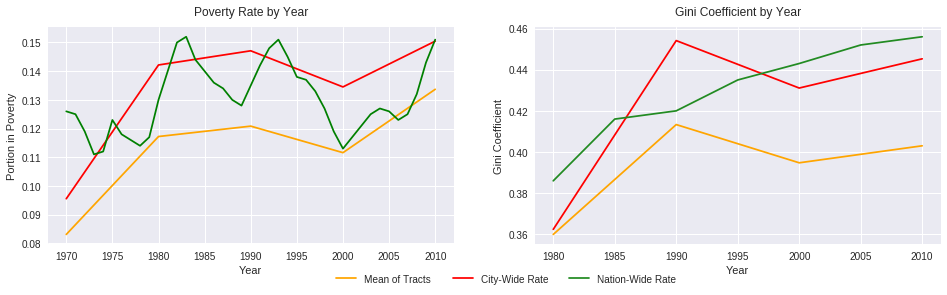

In [81]:
fig, axs = plt.subplots(1,2, figsize=(16, 4))
axs[0].plot([1970, 1980, 1990, 2000, 2010], [pov70.mean(), pov80.mean(), pov90.mean(), pov00.mean(), pov10.mean()], color='red')
axs[0].plot([1970, 1980, 1990, 2000, 2010], [cityWidePov70, cityWidePov80, cityWidePov90, cityWidePov00, cityWidePov10], color='orange')
axs[0].plot(relvYears, color='green')
axs[0].set_ylabel('Portion in Poverty')
axs[0].set_title('Poverty Rate by Year', y=1.025)
# avg = mlines.Line2D([], [], color='orange', label='Mean of Tracts ')
# city = mlines.Line2D([], [], color='red', label='City-Wide Rate')
# nation = mlines.Line2D([], [], color='forestgreen', label='Nation-Wide Rate')

axs[0].set_xlabel('Year')
# axs[0].legend(handles=[avg, city, nation])
# plt.show()



# axs[1].figure(figsize=(8, 4))
axs[1].set_title('Gini Coefficient by Year',  y=1.025)
axs[1].plot([1980, 1990, 2000, 2010], [cityGini80, cityGini90, cityGini00, cityGini10], color='red')
axs[1].plot([1980, 1990, 2000, 2010], [ginis80.mean(), ginis90.mean(), ginis00.mean(), ginis10.mean()], color='orange')
axs[1].plot([1980, 1985, 1990, 1995, 2000, 2005, 2010], [.386, .416, .42, .435, .443, .452, .456], color='forestgreen')
axs[1].set_ylabel('Gini Coefficient')
axs[1].set_xlabel('Year')



nation = mlines.Line2D([], [], color='forestgreen', label='Nation-Wide Rate')
avg = mlines.Line2D([], [], color='orange', label='Mean of Tracts ')
city = mlines.Line2D([], [], color='red', label='City-Wide Rate')
plt.legend(handles=[avg, city, nation], loc = (-.5, -.2), ncol=3)
# plt.legend(handles=[avg, city], )
plt.show()

In [29]:
from scipy.stats.stats import pearsonr

In [30]:
pearsonr([cityGini80, cityGini90, cityGini00, cityGini10], [cityWidePov80, cityWidePov90, cityWidePov00, cityWidePov10])

(0.36788389245668024, 0.63211610754331959)

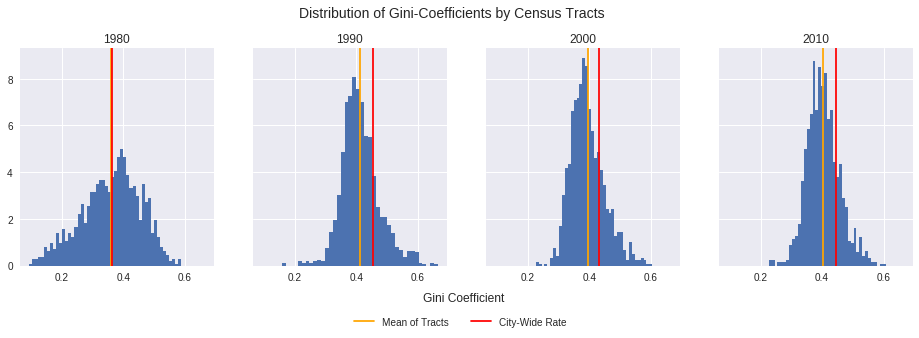

In [59]:
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True)
fig.set_figwidth(16)
fig.set_figheight(4)

fig.suptitle("Distribution of Gini-Coefficients by Census Tracts\n\n", fontsize=14, y=1.025)
fig.text(0.51, 0.0, 'Gini Coefficient', ha='center', fontsize=12)

axs[0].hist(ginis80.Gini, bins=50, normed=True)
axs[0].set_title("1980")
axs[0].axvline(ginis80.Gini.mean(), color='orange')
axs[0].axvline(cityGini80, color='red')

axs[1].hist(ginis90.Gini, bins=40, normed=True)
axs[1].axvline(ginis90.Gini.mean(), color='orange')
axs[1].set_title("1990")
axs[1].axvline(cityGini90, color='red')

axs[2].hist(ginis00.Gini, bins=40, normed=True)
axs[2].axvline(cityGini00, color='red')
axs[2].axvline(ginis00.Gini.mean(), color='orange')
axs[2].set_title("2000")

axs[3].hist(ginis10.Gini, bins=40, normed=True)
axs[3].axvline(cityGini10, color='red')
axs[3].axvline(ginis10.Gini.mean(), color='orange')
axs[3].set_title("2010")


avg = mlines.Line2D([], [], color='orange', label='Mean of Tracts ')
city = mlines.Line2D([], [], color='red', label='City-Wide Rate')
plt.legend(handles=[avg, city], loc = (-1.9, -.3), ncol=2)
plt.show()

In [32]:
print(ginis10.Gini.var())
print(ginis00.Gini.var())
print(ginis90.Gini.var())
print(ginis80.Gini.var())

0.00283301495348
0.00312052163553
0.00396332917063
0.00899491006213


In [33]:
ginis10.Gini.var() / ginis90.Gini.var()

0.71480687864113646

In [34]:
1 / (ginis10.Gini.var() / ginis90.Gini.var())

1.3989792626240838

In [35]:
from scipy.stats import probplot

### Gini-Poverty Ratio

In [36]:
povGini10 = pd.DataFrame(pov10.dropna()).join(ginis10)
povGini00 = pd.DataFrame(pov00.dropna()).join(ginis00)
povGini90 = pd.DataFrame(pov90.dropna()).join(ginis90)
povGini80 = pd.DataFrame(pov80.dropna()).join(ginis80)

In [37]:
for df in [povGini10, povGini00, povGini90, povGini80]:
    df["Ratio"] = df['Poverty Rate'] / df['Gini']

In [38]:
cityGinPovRat10 = cityWidePov10 / cityGini10
cityGinPovRat00 = cityWidePov00 / cityGini00
cityGinPovRat90 = cityWidePov90 / cityGini90
cityGinPovRat80 = cityWidePov80 / cityGini80

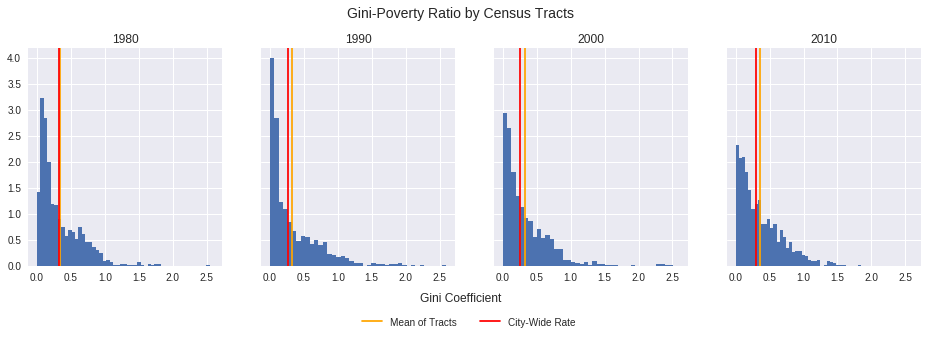

In [50]:
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True)
fig.set_figwidth(16)
fig.set_figheight(4)
fig.suptitle("Gini-Poverty Ratio by Census Tracts\n\n", fontsize=14, y=1.025)
fig.text(0.5, 0.0, 'Gini Coefficient', ha='center', fontsize=12)


axs[0].hist(povGini80.Ratio, bins=50, normed=True)
axs[0].set_title("1980")
axs[0].axvline(povGini80.Ratio.mean(), color='orange')
axs[0].axvline(cityGinPovRat80, color='red')

axs[1].hist(povGini90.Ratio, bins=40, normed=True)
axs[1].axvline(povGini90.Ratio.mean(), color='orange')
axs[1].set_title("1990")
axs[1].axvline(cityGinPovRat90, color='red')

axs[2].hist(povGini00.Ratio, bins=40, normed=True)
axs[2].axvline(cityGinPovRat00, color='red')
axs[2].axvline(povGini00.Ratio.mean(), color='orange')
axs[2].set_title("2000")

axs[3].hist(povGini10.Ratio, bins=40, normed=True)
axs[3].axvline(cityGinPovRat10, color='red')
axs[3].axvline(povGini10.Ratio.mean(), color='orange')
axs[3].set_title("2010")


avg = mlines.Line2D([], [], color='orange', label='Mean of Tracts ')
city = mlines.Line2D([], [], color='red', label='City-Wide Rate')
plt.legend(handles=[avg, city], loc = (-1.9, -.3), ncol=2)
plt.show()

In [ ]:
regplot()

In [66]:
from seaborn import lmplot

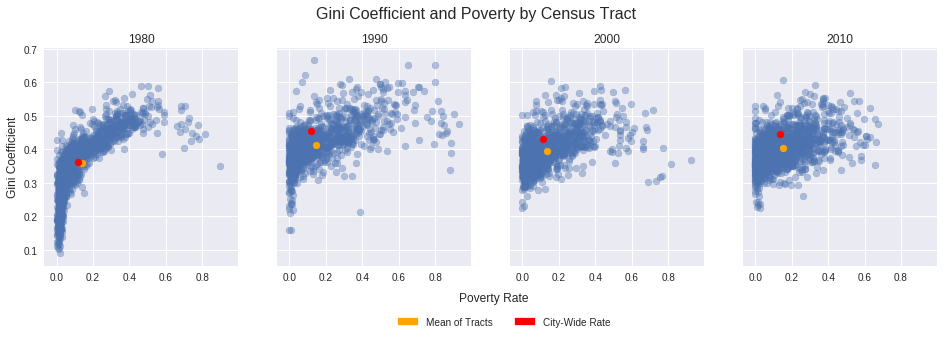

In [88]:
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True)
fig.set_figwidth(16)
fig.set_figheight(4)
fig.suptitle("Gini Coefficient and Poverty by Census Tract", fontsize=16, y=1.025)
fig.text(0.515, 0.0, 'Poverty Rate', ha='center', fontsize=12)


axs[3].set_title('2010')
# regplot('Poverty Rate', 'Gini', povGini10, ax=axs[3], robust=True)
axs[3].scatter(povGini10['Poverty Rate'], povGini10['Gini'], alpha=.4)
axs[3].scatter(pov10.mean(), ginis10.Gini.mean(), color='orange')
axs[3].scatter(cityWidePov10, cityGini10, color='red')

axs[2].set_title('2000')
axs[2].scatter(povGini00['Poverty Rate'], povGini00['Gini'], alpha=.4)
axs[2].scatter(pov00.mean(), ginis00.Gini.mean(), color='orange')
axs[2].scatter(cityWidePov00, cityGini00, color='red')

axs[1].set_title('1990')
axs[1].scatter(povGini90['Poverty Rate'], povGini90['Gini'], alpha=.4)
axs[1].scatter(pov90.mean(), ginis90.Gini.mean(), color='orange')
axs[1].scatter(cityWidePov90, cityGini90, color='red')

axs[0].set_title('1980')
axs[0].set_ylabel('Gini Coefficient', fontsize=12)
axs[0].scatter(povGini80['Poverty Rate'], povGini80['Gini'], alpha=.4)
axs[0].scatter(pov80.mean(), ginis80.Gini.mean(), color='orange')
axs[0].scatter(cityWidePov80, cityGini80, color='red')

avg = mpatches.Circle([], [], color='orange', label='Mean of Tracts ')
city = mpatches.Circle([], [], color='red', label='City-Wide Rate')
plt.legend(handles=[avg, city], loc = (-1.8, -.3), ncol=2)
plt.show()

plt.show()

In [24]:
from statsmodels.api import OLS, RLM
from statsmodels.api import add_constant
import statsmodels.api as sm

In [65]:
plotFit = sm.graphics.plot_fit
plotReg = sm.graphics.plot_regress_exog

In [66]:
olsMod90 = OLS(povGini90['Gini'], add_constant(povGini90['Poverty Rate'])).fit()
olsMod00 = OLS(povGini00['Gini'], add_constant(povGini00['Poverty Rate'])).fit()
olsMod10 = OLS(povGini10['Gini'], add_constant(povGini10['Poverty Rate'])).fit()
olsMod80 = OLS(povGini80['Gini'], add_constant(povGini80['Poverty Rate'])).fit()

In [69]:
print(olsMod10.summary())
print(olsMod00.summary())
print(olsMod90.summary())
print(olsMod80.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gini   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     369.5
Date:                Mon, 27 Feb 2017   Prob (F-statistic):           1.01e-72
Time:                        13:17:02   Log-Likelihood:                 2147.2
No. Observations:                1310   AIC:                            -4290.
Df Residuals:                    1308   BIC:                            -4280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            0.3754      0.002    193.811   